<a href="https://colab.research.google.com/github/PeroumalPajany/TEMP/blob/main/breastcancer_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction ML Project

## Dataset
This is a study of the Kaggle-obtained Breast Cancer Wisconsin (Diagnostic) DataSet. This dataset will be used to train a machine learning classification model.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


## ML Libraries

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

import warnings  as ws
ws.filterwarnings("ignore")

## Data Load

In [235]:
df = pd.read_csv("https://raw.githubusercontent.com/PeroumalPajany/TEMP/main/breastcancer.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Pre-Processing

In [236]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [237]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

In [238]:
y=df.loc[:,"diagnosis"]
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

##Visualization

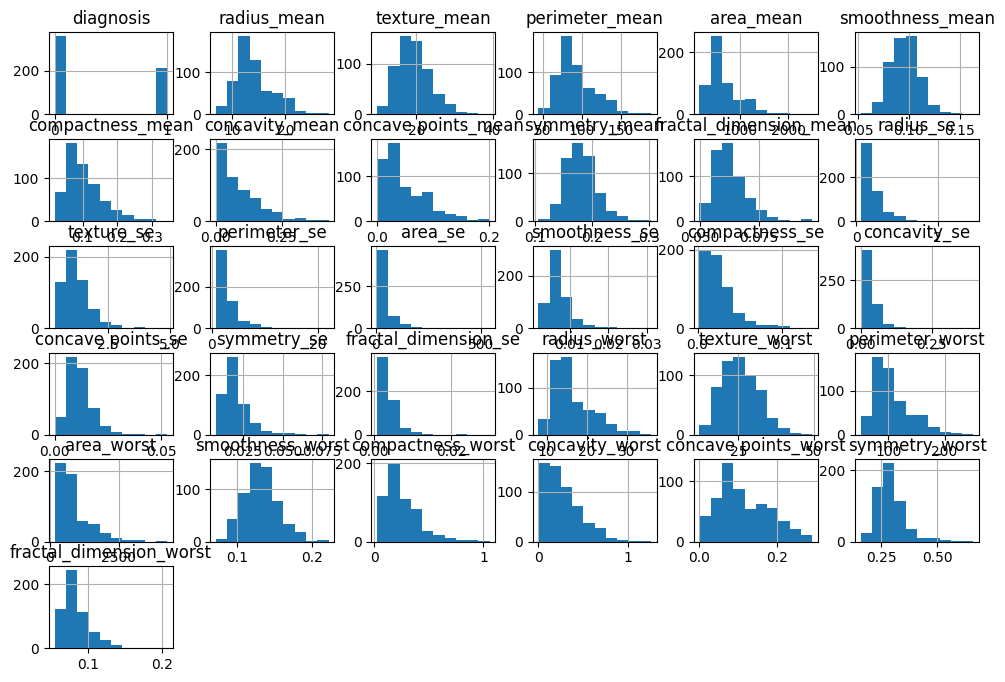

In [239]:
df.hist(figsize=(12,8))
plt.show()

In [240]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [241]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Split the data

In [242]:
X=df.loc[:,df.columns!="diagnosis"]
display(X)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 122)

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 122)

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)



##  Classify

Random Forest Model  
Decision Tree Model  
K-Nearest Neighbors (KNN) Model  
Logistic Regression Model  
XGBoost Model  
Naive Baiyes  


In [246]:
def model_Evaluate(model):

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(5, 2))
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title ("Confusion Matrix")

### Random Forest Model

In [247]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



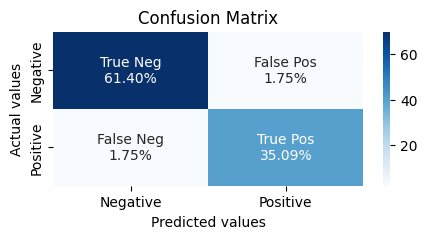

In [248]:
acc_rf= model_Evaluate(rf)

### Decision Tree Model

dc = DecisionTreeClassifier()
x= dc.fit(X_train, y_train)
acc_dc= model_Evaluate(dc)
acc_rf= model_Evaluate(rf)


In [249]:
dc = DecisionTreeClassifier()
x= dc.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        72
           1       0.90      0.86      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



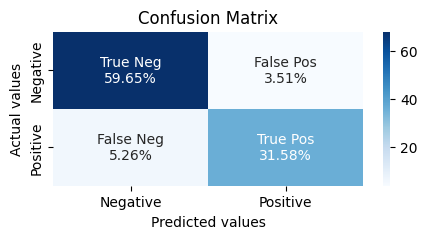

In [250]:
acc_dc= model_Evaluate(dc)

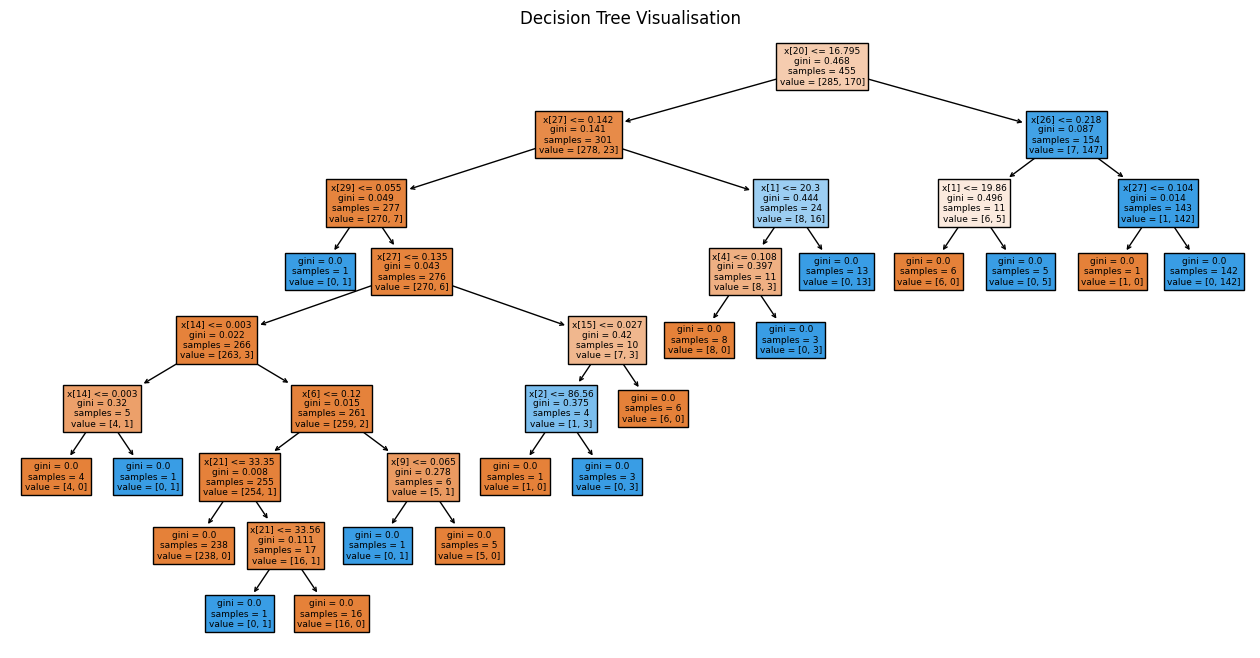

In [251]:
plt.figure(figsize=(16, 8))
tree.plot_tree(dc, filled=True)
plt.title("Decision Tree Visualisation")
plt.show()

### K-Nearest Neighbors (KNN) Model

In [252]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)


KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



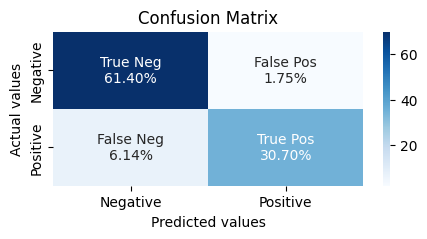

In [253]:
acc_kn= model_Evaluate(kn)

### Logistic Regression Model

In [254]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



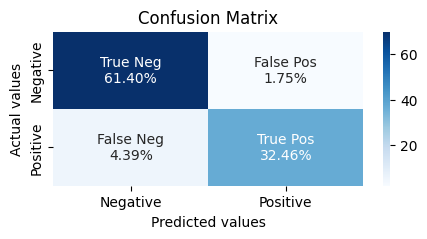

In [255]:
acc_lr= model_Evaluate(lr)

### XGBoost Model

In [256]:
xg = XGBClassifier()
xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



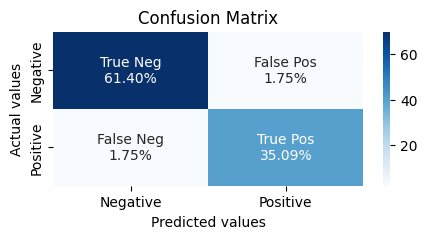

In [257]:
acc_xg= model_Evaluate(xg)

### Naive Baiyes

In [258]:
gb = GaussianNB()
gb.fit(X_train, y_train)


GaussianNB()

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



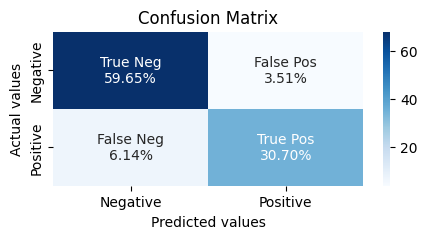

In [259]:
acc_gb= model_Evaluate(gb)

### Gradient Boosting

In [260]:
gbb = GradientBoostingClassifier()
gbb.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



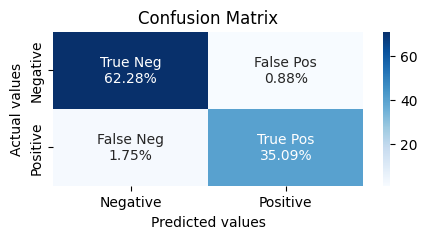

In [261]:
acc_gbb= model_Evaluate(gbb)

## Comparision Analysis

In [262]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

probs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    probs[name] = model.predict_proba(X_test)[:, 1]

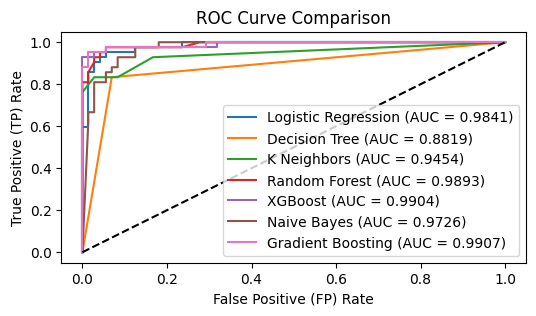

,Model,AUC,Precision,Recall,Accuracy,F1 Score
6,Gradient Boosting,0.990741,0.975610,0.952381,0.973684,0.963855
4,XGBoost,0.990410,0.952381,0.952381,0.964912,0.952381
3,Random Forest,0.989253,0.928571,0.928571,0.947368,0.928571
0,Logistic Regression,0.984127,0.948718,0.880952,0.938596,0.913580
5,Naive Bayes,0.972553,0.897436,0.833333,0.903509,0.864198
2,K Neighbors,0.945437,0.945946,0.833333,0.921053,0.886076
1,Decision Tree,0.881944,0.875000,0.833333,0.894737,0.853659


In [265]:

roc_data = {}

for name, probabilities in probs.items():
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    predictions = (probabilities > 0.5).astype(int)  # assuming threshold of 0.5
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_data[name] = {
        'FPR': fpr,
        'TPR': tpr,
        'AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1
    }

columns = ["Model", "AUC", "Precision", "Recall", "Accuracy", "F1 Score"]
data = {col: [] for col in columns}

for name, metrics in roc_data.items():
    data["Model"].append(name)
    data["AUC"].append(metrics['AUC'])
    data["Precision"].append(metrics['Precision'])
    data["Recall"].append(metrics['Recall'])
    data["Accuracy"].append(metrics['Accuracy'])
    data["F1 Score"].append(metrics['F1 Score'])

df_metrics = pd.DataFrame(data)
df_metrics_sorted = df_metrics.sort_values(by='AUC', ascending=False)



plt.figure(figsize=(6, 3))
for name, metrics in roc_data.items():
    plt.plot(metrics['FPR'], metrics['TPR'], label=f'{name} (AUC = {metrics["AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive (FP) Rate')
plt.ylabel('True Positive (TP) Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

display(df_metrics_sorted)